In [13]:
from typing import List, Dict
from collections import Counter
import math

import matplotlib.pyplot as plt

def bucketize(point: float, bucket_size: float) -> float:
    """Floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """Buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)

In [17]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *height* and *width*. The vertical baseline
    is *bottom* (default 0).
    
    Many parameters can take either a single value applying to all bars
    or a sequence of values, one for each bar.
    
    Parameters
    ----------
    x : float or array-like
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : float or array-like
        The height(s) of the bars.
    
    width : float or array-like, default: 0.8
        The width(s) of the bars.
    
    bottom : float or array-like, default: 0
        The y coordinate(s) of the bars bases.
    
    align : {'center', 'edge'}, default: 'center'
        Alignment of the bars to the *x* coordinates:
    
   

In [22]:
a = [.5,.6,.63,.65,.73,.79,.83,.85,.93,.94,.95,1.1,1.2,1.3,1.3,1.31,1.38,1.5,1.65,1.7,1.8,1.9,2,2.1,2.25,3.4,3.5,3.6,3.75,3.78,3.8,3.9,3.95]

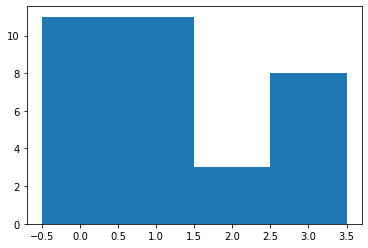

In [24]:
plot_histogram(a,1.0)

In [25]:
b = make_histogram(a,1)

In [38]:
list(b.keys())

[0, 1, 2, 3]

<BarContainer object of 4 artists>

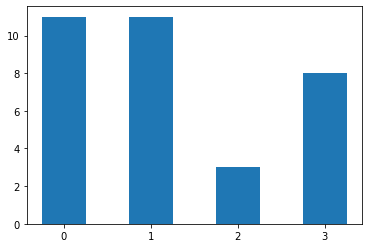

In [42]:
plt.bar(b.keys(),b.values(),tick_label=list(b.keys()),width=0.5)

In [28]:
import random
from probability import inverse_normal_cdf

def random_normal() -> float:
    """Returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())

In [29]:
xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

Text(0.5, 1.0, 'Very Different Joint Distributions')

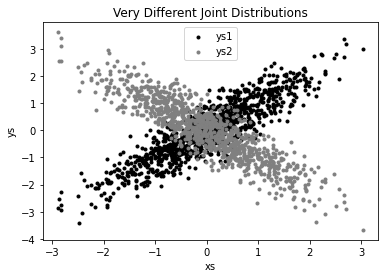

In [4]:
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray',  label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")

In [5]:
from statistics import correlation


assert 0.89 < correlation(xs, ys1) < 0.91
assert -0.91 < correlation(xs, ys2) < -0.89

In [45]:
#from statistics import correlation
help(correlation)

Help on function correlation in module statistics:

correlation(xs: List[float], ys: List[float]) -> float
    Measures how much xs and ys vary in tandem about their means



In [52]:
#from linear_algebra import Vector
a= [1,2,3,3,3,4,5]
b=[2*i for i in a]
b

[2, 4, 6, 6, 6, 8, 10]

In [62]:
c=[0 for i in range(1,7)]
c

[0, 0, 0, 0, 0, 0]

In [63]:
correlation(a,c)

0

In [64]:
from linear_algebra import make_matrix
help(make_matrix)

Help on function make_matrix in module linear_algebra:

make_matrix(num_rows: int, num_cols: int, entry_fn: Callable[[int, int], float]) -> List[List[float]]
    Returns a num_rows x num_cols matrix
    whose (i,j)-th entry is entry_fn(i, j)



In [74]:
d = make_matrix(2,4,lambda x,y: x+y)

In [75]:
d

[[0, 1, 2, 3], [1, 2, 3, 4]]

In [6]:
from linear_algebra import Matrix, Vector, make_matrix
from typing import List, Dict

def correlation_matrix(data: List[Vector]) -> Matrix:
    """
    Returns the len(data) x len(data) matrix whose (i, j)-th entry
    is the correlation between data[i] and data[j]
    """
    def correlation_ij(i: int, j: int) -> float:
        return correlation(data[i], data[j])

    return make_matrix(len(data), len(data), correlation_ij)


In [7]:
vectors = [xs, ys1, ys2]
assert correlation_matrix(vectors) == [
    [correlation(xs,  xs), correlation(xs,  ys1), correlation(xs,  ys2)],
    [correlation(ys1, xs), correlation(ys1, ys1), correlation(ys1, ys2)],
    [correlation(ys2, xs), correlation(ys2, ys1), correlation(ys2, ys2)],
]

In [77]:
import datetime

stock_price = {'closing_price': 102.06,
               'date': datetime.date(2014, 8, 29),
               'symbol': 'AAPL'}


In [78]:
prices: Dict[datetime.date, float] = {}

from typing import NamedTuple

class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        """It's a class, so we can add methods too"""
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']


In [79]:
price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
assert price.is_high_tech()

In [89]:
help(datetime.date)

Help on class date in module datetime:

class date(builtins.object)
 |  date(year, month, day) --> date object
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __format__(...)
 |      Formats self with strftime.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __lt__(self, value, /)
 |      Return self<value.
 |  
 |  __ne__(self, value, /)
 |      Return self!=value.
 |  
 |  __radd__(self, value, /)
 |      Return value+self.
 |  
 |  __reduce__(...)
 |      __reduce__() -> (cls, state)
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  __rsub__(self, value, /)
 |      Return value-self.
 |  
 |  _

In [90]:
from dateutil.parser import parse

def parse_row(row: List[str]) -> StockPrice:
    symbol, date, closing_price = row
    return StockPrice(symbol=symbol,
                      date=parse(date).date(),
                      closing_price=float(closing_price))

In [98]:
a=datetime.date(2015,1,25)
type(a)

datetime.date

In [106]:
b = parse("2015-01-25").date()
b

datetime.date(2015, 1, 25)

In [102]:
x=datetime.date(2015,1,25)
type(x)

datetime.date

In [91]:
# Now test our function
stock = parse_row(["MSFT", "2018-12-14", "106.03"])

assert stock.symbol == "MSFT"
assert stock.date == datetime.date(2018, 12, 14)
assert stock.closing_price == 106.03

In [129]:
from typing import Optional
import re

def try_parse_row(row: List[str]) -> Optional[StockPrice]:
    symbol, date_, closing_price_ = row

    # Stock symbol should be all capital letters
    if not re.match(r"^[A-Z]+$", symbol):
        return None

    try:
        date = parse(date_).date()
    except ValueError:
        return None

    try:
        closing_price = float(closing_price_)
    except ValueError:
        return None

    return StockPrice(symbol, date, closing_price)

# Should return None for errors
assert try_parse_row(["MSFT0", "2018-12-14", "106.03"]) is None
assert try_parse_row(["MSFT", "2018-12--14", "106.03"]) is None
assert try_parse_row(["MSFT", "2018-12-14", "x"]) is None

# But should return same as before if data is good.
assert try_parse_row(["MSFT", "2018-12-14", "106.03"]) == stock

In [107]:
from dateutil.parser import parse
import csv

with open("stocks.csv", "r") as f:
    reader = csv.DictReader(f)
    rows = [[row['Symbol'], row['Date'], row['Close']]
            for row in reader]

In [126]:
list(map(lambda i:i[2],rows[:6]))
        

['0.513393', '0.486607', '0.450893', '0.462054', '0.475446', '0.504464']

In [134]:
[i[2] for i in rows[:6]]

['0.513393', '0.486607', '0.450893', '0.462054', '0.475446', '0.504464']

In [131]:
data

[StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 12), closing_price=0.513393),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 15), closing_price=0.486607),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 16), closing_price=0.450893),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 17), closing_price=0.462054),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 18), closing_price=0.475446),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 19), closing_price=0.504464),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 22), closing_price=0.529018),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 23), closing_price=0.551339),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 24), closing_price=0.580357),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 26), closing_price=0.633929),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 29), closing_price=0.642857),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12

In [130]:
maybe_data = [try_parse_row(row) for row in rows]

# Make sure they all loaded successfully:
assert maybe_data
assert all(sp is not None for sp in maybe_data)

# This is just to make mypy happy
data = [sp for sp in maybe_data if sp is not None]

In [132]:
max_aapl_price = max(stock_price.closing_price
                     for stock_price in data
                     if stock_price.symbol == "AAPL")

In [133]:
max_aapl_price

232.070007

In [135]:
from collections import defaultdict

max_prices: Dict[str, float] = defaultdict(lambda: float('-inf'))

for sp in data:
    symbol, closing_price = sp.symbol, sp.closing_price
    if closing_price > max_prices[symbol]:
        max_prices[symbol] = closing_price

In [136]:
max_prices

defaultdict(<function __main__.<lambda>()>,
            {'AAPL': 232.070007,
             'MSFT': 115.610001,
             'FB': 217.5,
             'GOOG': 1268.329956})

In [138]:
type(float('-inf'))

float

In [139]:
from typing import List
from collections import defaultdict

# Collect the prices by symbol
prices: Dict[str, List[StockPrice]] = defaultdict(list)

for sp in data:
    prices[sp.symbol].append(sp)

# Order the prices by date
prices = {symbol: sorted(symbol_prices)
          for symbol, symbol_prices in prices.items()}

In [142]:
x = {a:2*a for a in range(1,10)}

In [151]:
x = {a:b for a,b in zip([1,2,3],[4,5,6])}

In [153]:
def pct_change(yesterday: StockPrice, today: StockPrice) -> float:
    return today.closing_price / yesterday.closing_price - 1

class DailyChange(NamedTuple):
    symbol: str
    date: datetime.date
    pct_change: float

In [154]:
prices

{'AAPL': [StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 12), closing_price=0.513393),
  StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 15), closing_price=0.486607),
  StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 16), closing_price=0.450893),
  StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 17), closing_price=0.462054),
  StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 18), closing_price=0.475446),
  StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 19), closing_price=0.504464),
  StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 22), closing_price=0.529018),
  StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 23), closing_price=0.551339),
  StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 24), closing_price=0.580357),
  StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 26), closing_price=0.633929),
  StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 29), closing_price=0.642857),
  StockPrice(symbol='AAPL', date=da

In [165]:
x=list(prices.values())
x[-1]

[StockPrice(symbol='GOOG', date=datetime.date(2004, 8, 19), closing_price=49.845802),
 StockPrice(symbol='GOOG', date=datetime.date(2004, 8, 20), closing_price=53.80505),
 StockPrice(symbol='GOOG', date=datetime.date(2004, 8, 23), closing_price=54.346527),
 StockPrice(symbol='GOOG', date=datetime.date(2004, 8, 24), closing_price=52.096165),
 StockPrice(symbol='GOOG', date=datetime.date(2004, 8, 25), closing_price=52.657513),
 StockPrice(symbol='GOOG', date=datetime.date(2004, 8, 26), closing_price=53.606342),
 StockPrice(symbol='GOOG', date=datetime.date(2004, 8, 27), closing_price=52.732029),
 StockPrice(symbol='GOOG', date=datetime.date(2004, 8, 30), closing_price=50.675404),
 StockPrice(symbol='GOOG', date=datetime.date(2004, 8, 31), closing_price=50.85424),
 StockPrice(symbol='GOOG', date=datetime.date(2004, 9, 1), closing_price=49.80109),
 StockPrice(symbol='GOOG', date=datetime.date(2004, 9, 2), closing_price=50.427021),
 StockPrice(symbol='GOOG', date=datetime.date(2004, 9, 3), 

In [166]:
def day_over_day_changes(prices: List[StockPrice]) -> List[DailyChange]:
    """
    Assumes prices are for one stock and are in order
    """
    return [DailyChange(symbol=today.symbol,
                        date=today.date,
                        pct_change=pct_change(yesterday, today))
            for yesterday, today in zip(prices, prices[1:])]

In [167]:
all_changes = [change
               for symbol_prices in prices.values()
               for change in day_over_day_changes(symbol_prices)]

In [169]:
all_changes[:5]

[DailyChange(symbol='AAPL', date=datetime.date(1980, 12, 15), pct_change=-0.05217445504710816),
 DailyChange(symbol='AAPL', date=datetime.date(1980, 12, 16), pct_change=-0.07339392980372261),
 DailyChange(symbol='AAPL', date=datetime.date(1980, 12, 17), pct_change=0.0247531010683244),
 DailyChange(symbol='AAPL', date=datetime.date(1980, 12, 18), pct_change=0.02898362529055043),
 DailyChange(symbol='AAPL', date=datetime.date(1980, 12, 19), pct_change=0.061033219335108635)]

In [33]:
max_change = max(all_changes, key=lambda change: change.pct_change)

In [170]:
a1 = [1,2,3,4]
a2 = ['One','Two','Three','Four']
a= {x:y for x,y in zip(a1,a2)}
a

{1: 'One', 2: 'Two', 3: 'Three', 4: 'Four'}

In [180]:
dict(sorted(a.items(), key = lambda x: x[1]))

{4: 'Four', 1: 'One', 3: 'Three', 2: 'Two'}

In [187]:
max(a.items(), key = lambda x: x[1])

(2, 'Two')

In [35]:
changes_by_month: List[DailyChange] = {month: [] for month in range(1, 13)}

In [40]:
type(changes_by_month)

dict

In [189]:
changes_by_month = {month: [] for month in range(1, 13)}

In [190]:
for change in all_changes:
    changes_by_month[change.date.month].append(change)

In [191]:
avg_daily_change = {
    month: sum(change.pct_change for change in changes) / len(changes)
    for month, changes in changes_by_month.items()
}

In [192]:
# October is the best month
assert avg_daily_change[10] == max(avg_daily_change.values())

In [1]:
import math
from linear_algebra import distance

a_to_b = distance([160, 150], [170.2, 160])    # 14.28
a_to_c = distance([160, 150], [177.8, 171])    # 27.53
b_to_c = distance([170.2, 160], [177.8, 171])  # 13.37

In [2]:
a_to_b

14.284257068535268

In [5]:
from typing import Tuple,List
Vector = List[float]

from linear_algebra import vector_mean
from statistics import standard_deviation

def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
    """returns the means and standard deviations for each position"""
    dim = len(data[0])

    means = vector_mean(data)
    stdevs = [standard_deviation([vector[i] for vector in data])
              for i in range(dim)]

    return means, stdevs

vectors = [[-3, -1, 1], [-1, 0, 1], [1, 1, 1]]
means, stdevs = scale(vectors)
assert means == [-1, 0, 1]
assert stdevs == [2, 1, 0]

In [6]:
def rescale(data: List[Vector]) -> List[Vector]:
    """
    Rescales the input data so that each position has
    mean 0 and standard deviation 1. (Leaves a position
    as is if its standard deviation is 0.)
    """
    dim = len(data[0])
    means, stdevs = scale(data)

    # Make a copy of each vector
    rescaled = [v[:] for v in data]

    for v in rescaled:
        for i in range(dim):
            if stdevs[i] > 0:
                v[i] = (v[i] - means[i]) / stdevs[i]

    return rescaled

means, stdevs = scale(rescale(vectors))
assert means == [0, 0, 1]
assert stdevs == [1, 1, 0]

In [7]:
import tqdm


pca_data = [
[20.9666776351559,-13.1138080189357],
[22.7719907680008,-19.8890894944696],
[25.6687103160153,-11.9956004517219],
[18.0019794950564,-18.1989191165133],
[21.3967402102156,-10.8893126308196],
[0.443696899177716,-19.7221132386308],
[29.9198322142127,-14.0958668502427],
[19.0805843080126,-13.7888747608312],
[16.4685063521314,-11.2612927034291],
[21.4597664701884,-12.4740034586705],
[3.87655283720532,-17.575162461771],
[34.5713920556787,-10.705185165378],
[13.3732115747722,-16.7270274494424],
[20.7281704141919,-8.81165591556553],
[24.839851437942,-12.1240962157419],
[20.3019544741252,-12.8725060780898],
[21.9021426929599,-17.3225432396452],
[23.2285885715486,-12.2676568419045],
[28.5749111681851,-13.2616470619453],
[29.2957424128701,-14.6299928678996],
[15.2495527798625,-18.4649714274207],
[26.5567257400476,-9.19794350561966],
[30.1934232346361,-12.6272709845971],
[36.8267446011057,-7.25409849336718],
[32.157416823084,-10.4729534347553],
[5.85964365291694,-22.6573731626132],
[25.7426190674693,-14.8055803854566],
[16.237602636139,-16.5920595763719],
[14.7408608850568,-20.0537715298403],
[6.85907008242544,-18.3965586884781],
[26.5918329233128,-8.92664811750842],
[-11.2216019958228,-27.0519081982856],
[8.93593745011035,-20.8261235122575],
[24.4481258671796,-18.0324012215159],
[2.82048515404903,-22.4208457598703],
[30.8803004755948,-11.455358009593],
[15.4586738236098,-11.1242825084309],
[28.5332537090494,-14.7898744423126],
[40.4830293441052,-2.41946428697183],
[15.7563759125684,-13.5771266003795],
[19.3635588851727,-20.6224770470434],
[13.4212840786467,-19.0238227375766],
[7.77570680426702,-16.6385739839089],
[21.4865983854408,-15.290799330002],
[12.6392705930724,-23.6433305964301],
[12.4746151388128,-17.9720169566614],
[23.4572410437998,-14.602080545086],
[13.6878189833565,-18.9687408182414],
[15.4077465943441,-14.5352487124086],
[20.3356581548895,-10.0883159703702],
[20.7093833689359,-12.6939091236766],
[11.1032293684441,-14.1383848928755],
[17.5048321498308,-9.2338593361801],
[16.3303688220188,-15.1054735529158],
[26.6929062710726,-13.306030567991],
[34.4985678099711,-9.86199941278607],
[39.1374291499406,-10.5621430853401],
[21.9088956482146,-9.95198845621849],
[22.2367457578087,-17.2200123442707],
[10.0032784145577,-19.3557700653426],
[14.045833906665,-15.871937521131],
[15.5640911917607,-18.3396956121887],
[24.4771926581586,-14.8715313479137],
[26.533415556629,-14.693883922494],
[12.8722580202544,-21.2750596021509],
[24.4768291376862,-15.9592080959207],
[18.2230748567433,-14.6541444069985],
[4.1902148367447,-20.6144032528762],
[12.4332594022086,-16.6079789231489],
[20.5483758651873,-18.8512560786321],
[17.8180560451358,-12.5451990696752],
[11.0071081078049,-20.3938092335862],
[8.30560561422449,-22.9503944138682],
[33.9857852657284,-4.8371294974382],
[17.4376502239652,-14.5095976075022],
[29.0379635148943,-14.8461553663227],
[29.1344666599319,-7.70862921632672],
[32.9730697624544,-15.5839178785654],
[13.4211493998212,-20.150199857584],
[11.380538260355,-12.8619410359766],
[28.672631499186,-8.51866271785711],
[16.4296061111902,-23.3326051279759],
[25.7168371582585,-13.8899296143829],
[13.3185154732595,-17.8959160024249],
[3.60832478605376,-25.4023343597712],
[39.5445949652652,-11.466377647931],
[25.1693484426101,-12.2752652925707],
[25.2884257196471,-7.06710309184533],
[6.77665715793125,-22.3947299635571],
[20.1844223778907,-16.0427471125407],
[25.5506805272535,-9.33856532270204],
[25.1495682602477,-7.17350567090738],
[15.6978431006492,-17.5979197162642],
[37.42780451491,-10.843637288504],
[22.974620174842,-10.6171162611686],
[34.6327117468934,-9.26182440487384],
[34.7042513789061,-6.9630753351114],
[15.6563953929008,-17.2196961218915],
[25.2049825789225,-14.1592086208169]
]


In [9]:
from linear_algebra import subtract

def de_mean(data: List[Vector]) -> List[Vector]:
    """Recenters the data to have mean 0 in every dimension"""
    mean = vector_mean(data)
    return [subtract(vector, mean) for vector in data]

In [10]:
from linear_algebra import magnitude

def direction(w: Vector) -> Vector:
    mag = magnitude(w)
    return [w_i / mag for w_i in w]

In [11]:
from linear_algebra import dot

def directional_variance(data: List[Vector], w: Vector) -> float:
    """
    Returns the variance of x in the direction of w
    """
    w_dir = direction(w)
    return sum(dot(v, w_dir) ** 2 for v in data)

In [12]:
def directional_variance_gradient(data: List[Vector], w: Vector) -> Vector:
    """
    The gradient of directional variance with respect to w
    """
    w_dir = direction(w)
    return [sum(2 * dot(v, w_dir) * v[i] for v in data)
            for i in range(len(w))]

In [13]:
from gradient_descent import gradient_step

def first_principal_component(data: List[Vector],
                              n: int = 100,
                              step_size: float = 0.1) -> Vector:
    # Start with a random guess
    guess = [1.0 for _ in data[0]]

    with tqdm.trange(n) as t:
        for _ in t:
            dv = directional_variance(data, guess)
            gradient = directional_variance_gradient(data, guess)
            guess = gradient_step(guess, gradient, step_size)
            t.set_description(f"dv: {dv:.3f}")

    return direction(guess)

In [14]:
from linear_algebra import scalar_multiply

def project(v: Vector, w: Vector) -> Vector:
    """return the projection of v onto the direction w"""
    projection_length = dot(v, w)
    return scalar_multiply(projection_length, w)

In [15]:
from linear_algebra import subtract

def remove_projection_from_vector(v: Vector, w: Vector) -> Vector:
    """projects v onto w and subtracts the result from v"""
    return subtract(v, project(v, w))

def remove_projection(data: List[Vector], w: Vector) -> List[Vector]:
    return [remove_projection_from_vector(v, w) for v in data]

In [16]:
def pca(data: List[Vector], num_components: int) -> List[Vector]:
    components: List[Vector] = []
    for _ in range(num_components):
        component = first_principal_component(data)
        components.append(component)
        data = remove_projection(data, component)

    return components

In [17]:
def transform_vector(v: Vector, components: List[Vector]) -> Vector:
    return [dot(v, w) for w in components]

def transform(data: List[Vector], components: List[Vector]) -> List[Vector]:
    return [transform_vector(v, components) for v in data]

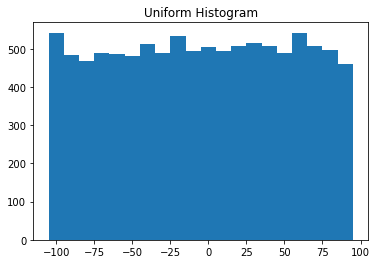

In [23]:
import random
from probability import inverse_normal_cdf

random.seed(0)

    # uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

# normal distribution with mean 0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random())
              for _ in range(10000)]

plot_histogram(uniform, 10, "Uniform Histogram")

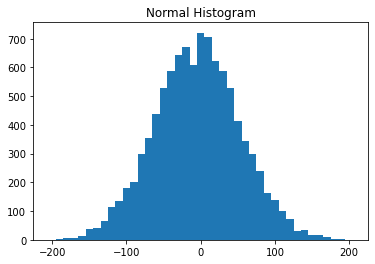

In [24]:
plot_histogram(normal, 10, "Normal Histogram")

In [30]:
from statistics import correlation

print(correlation(xs, ys1))      # about 0.9
print(correlation(xs, ys2))      # about -0.9

0.9010493686379609
-0.8920981526880033


In [31]:
from typing import List

    # Just some random data to show off correlation scatterplots
num_points = 100

def random_row() -> List[float]:
    row = [0.0, 0, 0, 0]
    row[0] = random_normal()
    row[1] = -5 * row[0] + random_normal()
    row[2] = row[0] + row[1] + 5 * random_normal()
    row[3] = 6 if row[2] > -2 else 0
    return row

In [32]:
 corr_rows = [random_row() for _ in range(num_points)]

In [34]:
len(corr_rows)

100

In [33]:
corr_rows[:10]

[[0.2189159393310547, -1.5274810791015625, 3.935260772705078, 6],
 [0.7976818084716797, -3.4070396423339844, -8.172950744628906, 0],
 [1.376504898071289, -6.397190093994141, 1.2362289428710938, 6],
 [0.6105899810791016, -4.253692626953125, -8.00363540649414, 0],
 [-0.7962894439697266, 3.8419532775878906, -9.067859649658203, 0],
 [-1.311960220336914, 7.412128448486328, 8.224334716796875, 6],
 [-1.1653995513916016, 4.518260955810547, -4.558391571044922, 0],
 [-0.31737327575683594, 1.3541412353515625, 1.2800979614257812, 6],
 [-2.3249340057373047, 12.399654388427734, 10.54636001586914, 6],
 [1.3696956634521484, -4.497623443603516, -5.520648956298828, 0]]

In [41]:
a = [[1,10],[2,9],[3,8]]
corr_data = [list(col) for col in zip(*a)]

In [42]:
corr_data

[[1, 2, 3], [10, 9, 8]]

In [43]:
 corr_data = [list(col) for col in zip(*corr_rows)]

In [44]:
len(corr_data)

4

In [48]:
len(corr_data[0])

100

(-3.555445671081543, 2.7741575241088867)

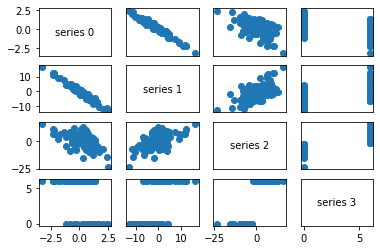

In [50]:
# corr_data is a list of four 100-d vectors
num_vectors = len(corr_data)
fig, ax = plt.subplots(num_vectors, num_vectors)

for i in range(num_vectors):
    for j in range(num_vectors):

            # Scatter column_j on the x-axis vs column_i on the y-axis,
        if i != j: ax[i][j].scatter(corr_data[j], corr_data[i])

            # unless i == j, in which case show the series name.
        else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                                    xycoords='axes fraction',
                                    ha="center", va="center")

            # Then hide axis labels except left and bottom charts
        if i < num_vectors - 1: ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False)

    # Fix the bottom right and top left axis labels, which are wrong because
    # their charts only have text in them
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())


In [51]:
de_meaned = de_mean(pca_data)
fpc = first_principal_component(de_meaned)


dv: 10279.151: 100%|████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 806.68it/s]


In [52]:
fpc

[0.9237307801943212, 0.3830423549969252]

In [53]:
%%writefile pca.py

import random
from probability import inverse_normal_cdf

def random_normal() -> float:
    """Returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())

from linear_algebra import Matrix, Vector, make_matrix
from typing import List, Dict

def correlation_matrix(data: List[Vector]) -> Matrix:
    """
    Returns the len(data) x len(data) matrix whose (i, j)-th entry
    is the correlation between data[i] and data[j]
    """
    def correlation_ij(i: int, j: int) -> float:
        return correlation(data[i], data[j])

    return make_matrix(len(data), len(data), correlation_ij)

from typing import Tuple,List
Vector = List[float]

from linear_algebra import vector_mean
from statistics import standard_deviation

def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
    """returns the means and standard deviations for each position"""
    dim = len(data[0])

    means = vector_mean(data)
    stdevs = [standard_deviation([vector[i] for vector in data])
              for i in range(dim)]

    return means, stdevs

def rescale(data: List[Vector]) -> List[Vector]:
    """
    Rescales the input data so that each position has
    mean 0 and standard deviation 1. (Leaves a position
    as is if its standard deviation is 0.)
    """
    dim = len(data[0])
    means, stdevs = scale(data)

    # Make a copy of each vector
    rescaled = [v[:] for v in data]

    for v in rescaled:
        for i in range(dim):
            if stdevs[i] > 0:
                v[i] = (v[i] - means[i]) / stdevs[i]

    return rescaled

from linear_algebra import subtract

def de_mean(data: List[Vector]) -> List[Vector]:
    """Recenters the data to have mean 0 in every dimension"""
    mean = vector_mean(data)
    return [subtract(vector, mean) for vector in data]

from linear_algebra import magnitude

def direction(w: Vector) -> Vector:
    mag = magnitude(w)
    return [w_i / mag for w_i in w]

from linear_algebra import dot

def directional_variance(data: List[Vector], w: Vector) -> float:
    """
    Returns the variance of x in the direction of w
    """
    w_dir = direction(w)
    return sum(dot(v, w_dir) ** 2 for v in data)

def directional_variance_gradient(data: List[Vector], w: Vector) -> Vector:
    """
    The gradient of directional variance with respect to w
    """
    w_dir = direction(w)
    return [sum(2 * dot(v, w_dir) * v[i] for v in data)
            for i in range(len(w))]

from gradient_descent import gradient_step

def first_principal_component(data: List[Vector],
                              n: int = 100,
                              step_size: float = 0.1) -> Vector:
    # Start with a random guess
    guess = [1.0 for _ in data[0]]

    with tqdm.trange(n) as t:
        for _ in t:
            dv = directional_variance(data, guess)
            gradient = directional_variance_gradient(data, guess)
            guess = gradient_step(guess, gradient, step_size)
            t.set_description(f"dv: {dv:.3f}")

    return direction(guess)

from linear_algebra import scalar_multiply

def project(v: Vector, w: Vector) -> Vector:
    """return the projection of v onto the direction w"""
    projection_length = dot(v, w)
    return scalar_multiply(projection_length, w)

from linear_algebra import subtract

def remove_projection_from_vector(v: Vector, w: Vector) -> Vector:
    """projects v onto w and subtracts the result from v"""
    return subtract(v, project(v, w))

def remove_projection(data: List[Vector], w: Vector) -> List[Vector]:
    return [remove_projection_from_vector(v, w) for v in data]

def pca(data: List[Vector], num_components: int) -> List[Vector]:
    components: List[Vector] = []
    for _ in range(num_components):
        component = first_principal_component(data)
        components.append(component)
        data = remove_projection(data, component)

    return components

def transform_vector(v: Vector, components: List[Vector]) -> Vector:
    return [dot(v, w) for w in components]

def transform(data: List[Vector], components: List[Vector]) -> List[Vector]:
    return [transform_vector(v, components) for v in data]

Writing pca.py
